<a href="https://colab.research.google.com/github/stephenmartin2951/SE-Group2-Implementation/blob/main/AIML_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%%shell
# Install or upgrade nbconvert
!pip install --upgrade nbconvert

# Verify the notebook file path
!ls /content/

# Convert the notebook to HTML
jupyter nbconvert --to html /content/John\ LoanAIML_ML_Project_full_code_notebook-3.ipynb

/bin/bash: line 2: !pip: command not found
/bin/bash: line 5: !ls: command not found
[NbConvertApp] Converting notebook /content/John LoanAIML_ML_Project_full_code_notebook-3.ipynb to html
[NbConvertApp] Writing 1394007 bytes to /content/John LoanAIML_ML_Project_full_code_notebook-3.html


## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [ ]:
import pandas as pd

# Replace the path with the path to your dataset
df = pd.read_csv('/content/drive/My Drive/Python Course/Loan_Modelling.csv')



## Data Overview

* Observations
* Sanity checks

In [ ]:


# Display the first few rows of the dataset to get a sense of its structure
df.head()

# Get basic information about the dataset (data types, number of non-null entries, etc.)
df.info()

# Get summary statistics (mean, std, min, max, etc.) for numerical columns
df.describe()

# Get the number of rows and columns in the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
Number of rows: 5000
Number of columns: 14


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

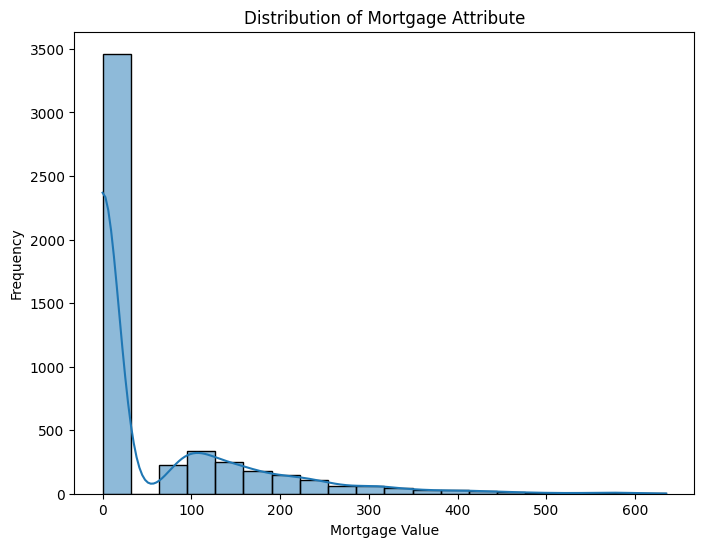

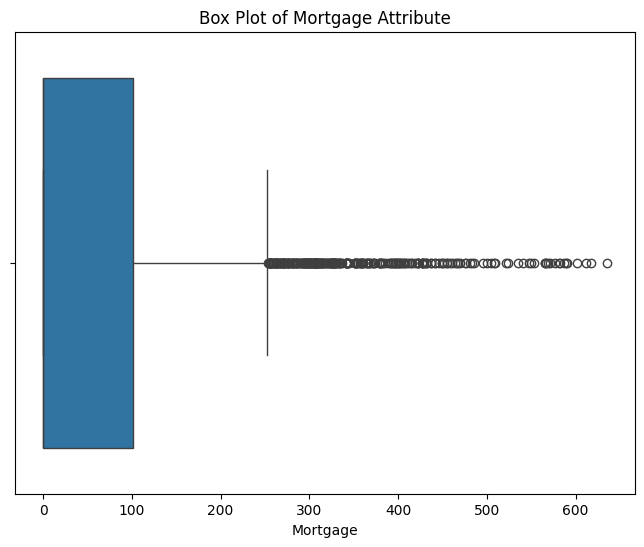

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Mortgage attribute
plt.figure(figsize=(8, 6))
sns.histplot(df['Mortgage'], bins=20, kde=True)
plt.title('Distribution of Mortgage Attribute')
plt.xlabel('Mortgage Value')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Mortgage'])
plt.title('Box Plot of Mortgage Attribute')
plt.show()


The majority of customers have either no mortgage or very low mortgage values, with a few customers having exceptionally high mortgage values, which are considered outliers.


In [ ]:


num_credit_card_customers = df['CreditCard'].sum()
print(f"Number of customers with credit cards: {num_credit_card_customers}")


Number of customers with credit cards: 1470


Correlation with Personal Loan:
Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64


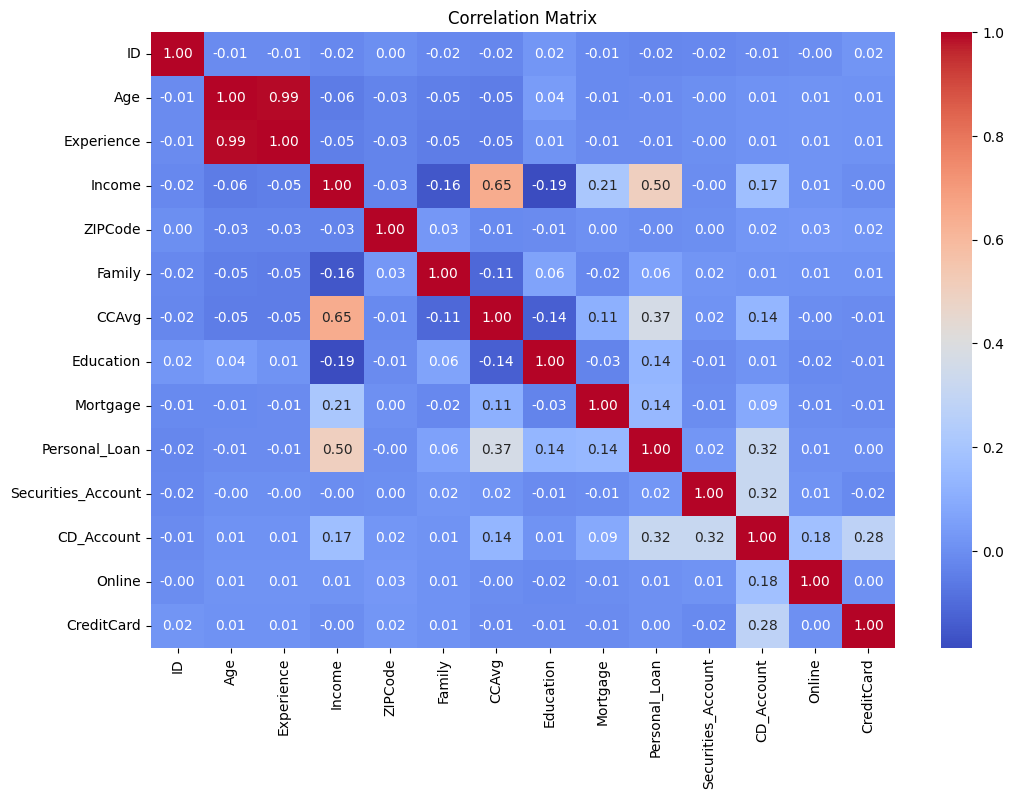

In [ ]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of all attributes with 'Personal_Loan'
correlation_with_personal_loan = correlation_matrix['Personal_Loan'].sort_values(ascending=False)

# Print the correlation with 'Personal_Loan'
print("Correlation with Personal Loan:")
print(correlation_with_personal_loan)

# You can also visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Attributes with a strong positive correlation with 'Personal_Loan' are potential indicators
# of a customer's likelihood to accept a personal loan offer.


 **Income** has the strongest positive correlation with **Personal_Loan**, with a correlation coefficient of **0.50**. This suggests that higher income levels are more strongly associated with customers taking out personal loans compared to other variables.

 The data above shows that the age doesn't correlate much with personal loan.

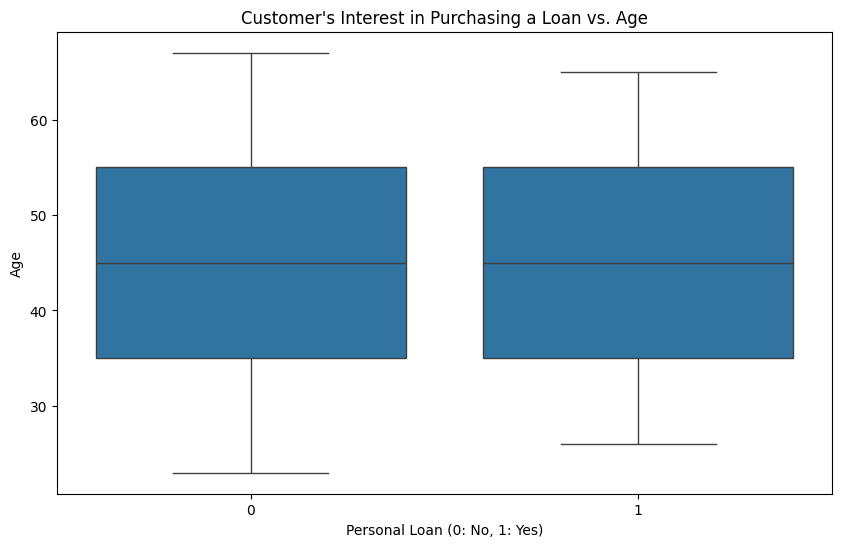

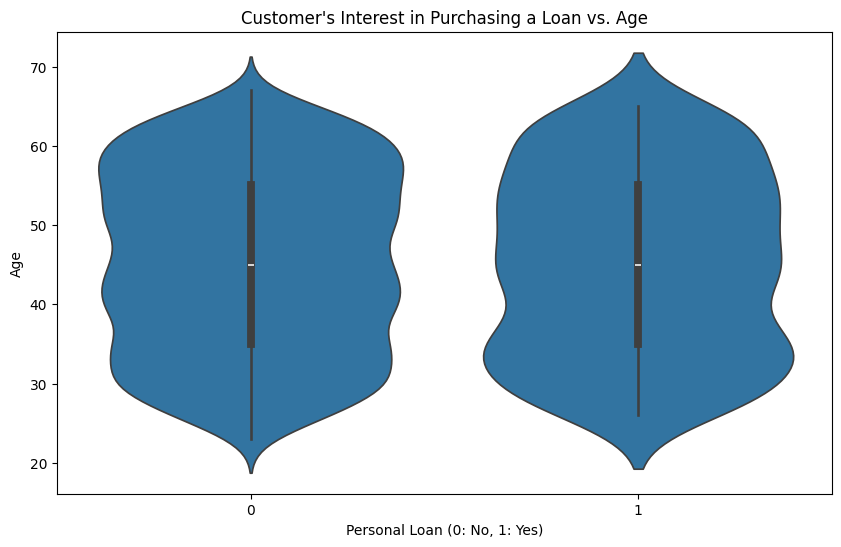

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=df)
plt.title("Customer's Interest in Purchasing a Loan vs. Age")
plt.xlabel("Personal Loan (0: No, 1: Yes)")
plt.ylabel("Age")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Personal_Loan', y='Age', data=df)
plt.title("Customer's Interest in Purchasing a Loan vs. Age")
plt.xlabel("Personal Loan (0: No, 1: Yes)")
plt.ylabel("Age")
plt.show()

According to this data, a customer's interest in purchasing a loan does not vary significantly with their age.


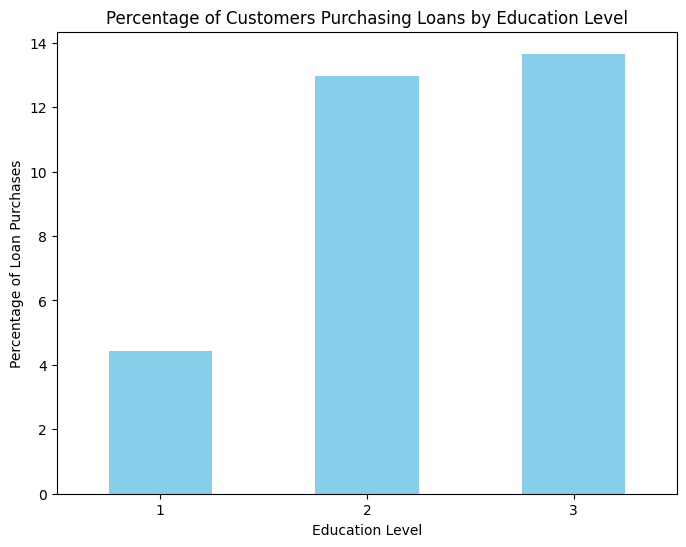

In [ ]:
import matplotlib.pyplot as plt

# Group the data by Education and calculate the percentage of people who purchased a loan (Personal_Loan = 1)
education_loan_data = df.groupby('Education')['Personal_Loan'].mean() * 100

# Plot the results
plt.figure(figsize=(8, 6))
education_loan_data.plot(kind='bar', color='skyblue')
plt.title("Percentage of Customers Purchasing Loans by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Percentage of Loan Purchases")
plt.xticks(rotation=0)
plt.show()


This plot shows the direct correlation between education and percentage of loan puchaces. The plot shows that the higher the education level, the more loans customers are likely to purchace.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/mnt/data/Loan_Modelling.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()


In [ ]:
# Display the first few rows of the dataset to get a sense of its structure
df.head()

# Get basic information about the dataset (data types, number of non-null entries, etc.)
df.info()

# Get summary statistics (mean, std, min, max, etc.) for numerical columns
df.describe()

# Get the number of rows and columns in the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
Number of rows: 5000
Number of columns: 14


Step 1: Missing Value Treatment

There are no missing values.

In [ ]:
# Step 1: Identify numerical columns
numerical_columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# Step 2: Calculate the IQR for outlier detection
Q1 = df[numerical_columns].quantile(0.25)  # 25th percentile
Q3 = df[numerical_columns].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Step 3: Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Detect outliers for each numerical column
outliers = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).sum()
print("Number of outliers detected in each column:")
print(outliers)

# Step 5: Remove outliers from the dataset
# Keep only rows where values are within the bounds for all numerical columns
df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

# Display the shape of the dataset before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")



Number of outliers detected in each column:
Age             0
Experience      0
Income         96
Family          0
CCAvg         324
Mortgage      291
dtype: int64
Original dataset shape: (5000, 14)
Dataset shape after removing outliers: (4398, 14)


In [ ]:


# Step 1: Create Interaction Features
# Example: Create an interaction feature between Income and Family size
df['Income_Family_Ratio'] = df['Income'] / (df['Family'] + 1)  # +1 to avoid division by zero

# Step 2: Binning Continuous Variables (e.g., Age groups)
age_bins = [18, 30, 40, 50, 60, 100]  # Defining age ranges
age_labels = ['18-30', '30-40', '40-50', '50-60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Step 3: One-Hot Encoding Categorical Variables (e.g., Education)
# One-hot encode 'Education' column (if it's not already encoded)
df = pd.get_dummies(df, columns=['Education'], drop_first=True)

# Step 4: Feature Scaling
# Scale the numerical features using StandardScaler
scaler = StandardScaler()
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Income_Family_Ratio']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Step 5: Creating New Features based on Domain Knowledge
# Example: Create a binary feature indicating if a customer has both a CD_Account and a Securities_Account
df['Has_Both_Accounts'] = np.where((df['Securities_Account'] == 1) & (df['CD_Account'] == 1), 1, 0)

# Display the first few rows to verify the changes
df.head()




,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Income_Family_Ratio,Age_Group,Education_2,Education_3,Has_Both_Accounts
0,1,-1.774417,-1.666078,-0.538229,91107,4,-0.193385,-0.555524,0,1,0,0,0,-0.777767,18-30,0,0,0
1,2,-0.029524,-0.096330,-0.864109,90089,3,-0.250611,-0.555524,0,1,0,0,0,-0.843059,40-50,0,0,0
2,3,-0.552992,-0.445163,-1.363793,94720,1,-0.536736,-0.555524,0,0,0,0,0,-0.993732,30-40,0,0,0
3,4,-0.901970,-0.968413,0.569765,94112,1,0.436091,-0.555524,0,0,0,0,0,1.241258,30-40,1,0,0
4,5,-0.901970,-1.055621,-0.625130,91330,4,-0.536736,-0.555524,0,0,0,0,1,-0.817947,30-40,1,0,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

def prepare_data_for_modeling(df):
    """
    Prepares the input DataFrame for modeling by performing the following steps:
    2. Creates new features.
    3. Encodes categorical variables.
    4. Scales numerical features.
    5. Splits the data into training and testing sets.

    Args:
        df: The input pandas DataFrame.

    Returns:
        X_train: Training features.
        X_test: Testing features.
        y_train: Training target.
        y_test: Testing target.
    """

    # Step 2: Create Interaction Features
    df['Income_Family_Ratio'] = df['Income'] / (df['Family'] + 1)

    # Step 3: Binning Continuous Variables
    age_bins = [18, 30, 40, 50, 60, 100]
    age_labels = ['18-30', '30-40', '40-50', '50-60', '60+']
    df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Step 4: One-Hot Encoding Categorical Variables
    categorical_features = ['Education', 'Age_Group']  # Include 'Age_Group'

    # Check if columns exist before applying get_dummies
    for col in categorical_features:
        if col in df.columns and df[col].dtype == 'object':  # Check for object type
            df = pd.get_dummies(df, columns=[col], drop_first=True, prefix=[col])  # Use prefix for clarity

    # Step 5: Feature Scaling
    numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Income_Family_Ratio']
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    # Step 6: Creating New Features based on Domain Knowledge
    df['Has_Both_Accounts'] = np.where((df['Securities_Account'] == 1) & (df['CD_Account'] == 1), 1, 0)

    # Step 7: Define Features (X) and Target (y)
    X = df.drop(['Personal_Loan', 'ID', 'ZIPCode'], axis=1)
    y = df['Personal_Loan']

    # Step 8: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the features (X) and the target (y)
X = df.drop(['Personal_Loan', 'ID', 'ZIPCode'], axis=1)  # Dropping irrelevant columns
y = df['Personal_Loan']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_output)


Accuracy: 0.988
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.95      0.93      0.94       105

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



Accuracy: 0.988
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.97      0.91      0.94       105

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



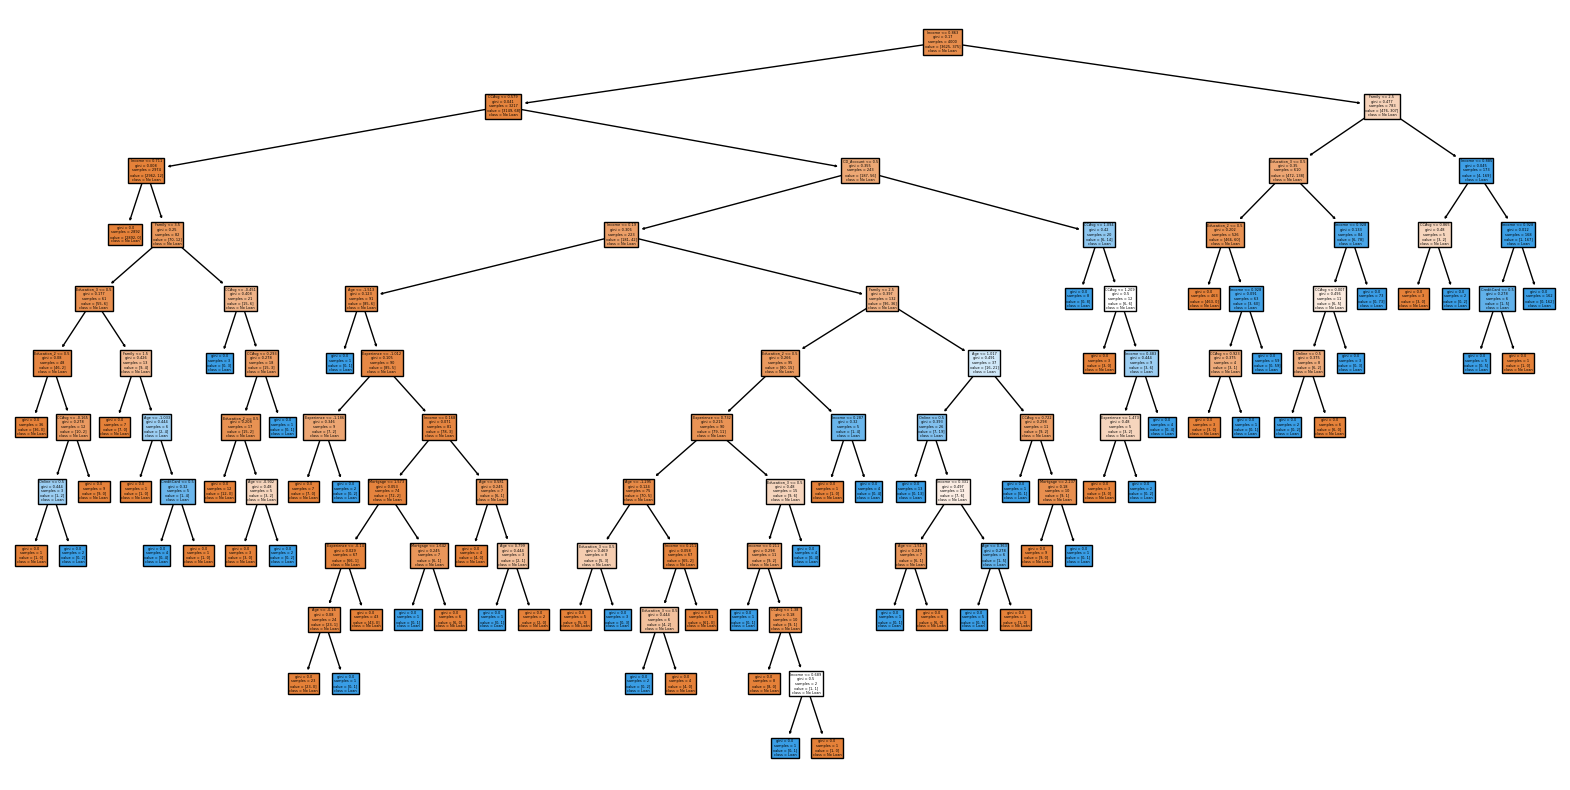

In [ ]:
# ipython-input-11-4c747f59c349

# Make sure to run the cell containing the following code first:
# (from ipython-input-4-4c747f59c349)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the features (X) and the target (y)
X = df.drop(['Personal_Loan', 'ID', 'ZIPCode'], axis=1)  # Dropping irrelevant columns
y = df['Personal_Loan']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_output)


# Now you can run the code below to plot the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['No Loan', 'Loan'], filled=True)
plt.show()

**Figure Description:**

This image is a **visualization of a decision tree** used for classification. Each box in the tree represents a decision node, with the following details:

- **Features**: At each node, the decision is made based on a feature (e.g., `Income`, `CCAvg`).
- **Gini Index**: The measure of impurity at each node, which helps the model decide the best split. Lower values indicate purer nodes (less uncertainty).
- **Samples**: The number of samples (data points) that reach that particular node.
- **Value**: The distribution of classes (e.g., how many samples belong to Class 0 vs. Class 1) at that node.
- **Class Prediction**: The predicted class at each terminal (leaf) node, based on the majority class after splits.

### Key Points:
- The tree starts with a root node at the top, and each branch represents a decision split based on feature values.
- The leaves at the bottom represent the final classification (e.g., whether a customer will take a loan or not), with color-coding likely indicating the predicted class (orange for one class, blue for another).
- The tree likely grows by recursively splitting the dataset at each node based on the best feature that minimizes uncertainty, down to pure or mostly pure leaf nodes.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the features (X) and the target (y)
X = df.drop(['Personal_Loan', 'ID', 'ZIPCode'], axis=1)  # Dropping irrelevant columns
y = df['Personal_Loan']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pre-Pruning: Set max_depth and min_samples_split for pre-pruning
pre_pruning_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
pre_pruning_model.fit(X_train, y_train)

# Make predictions with the pre-pruning model
y_pred_pre_pruning = pre_pruning_model.predict(X_test)

# Evaluate the pre-pruning model
accuracy_pre_pruning = accuracy_score(y_test, y_pred_pre_pruning)
classification_report_pre_pruning = classification_report(y_test, y_pred_pre_pruning)

print("Pre-Pruning Accuracy:", accuracy_pre_pruning)
print("Pre-Pruning Classification Report:\n", classification_report_pre_pruning)



Pre-Pruning Accuracy: 0.984
Pre-Pruning Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.93      0.91      0.92       105

    accuracy                           0.98      1000
   macro avg       0.96      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
# Train the full decision tree model without constraints
full_tree_model = DecisionTreeClassifier(random_state=42)
full_tree_model.fit(X_train, y_train)

# Post-Pruning: Apply cost-complexity pruning
path = full_tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Alpha values for pruning

# Train models with different alpha values and choose the best one based on the test set
pruned_models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    pruned_models.append(model)

# Choose the best post-pruning model based on accuracy
best_accuracy = 0
best_pruned_model = None
for model in pruned_models:
    y_pred_post_pruning = model.predict(X_test)
    accuracy_post_pruning = accuracy_score(y_test, y_pred_post_pruning)
    if accuracy_post_pruning > best_accuracy:
        best_accuracy = accuracy_post_pruning
        best_pruned_model = model

# Evaluate the best post-pruning model
y_pred_best_post_pruning = best_pruned_model.predict(X_test)
classification_report_post_pruning = classification_report(y_test, y_pred_best_post_pruning)

print("Post-Pruning Accuracy:", best_accuracy)
print("Post-Pruning Classification Report:\n", classification_report_post_pruning)


Post-Pruning Accuracy: 0.99
Post-Pruning Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.97      0.93      0.95       105

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



### Model Evaluation Criterion

#Default Decision Tree (Unpruned):
Accuracy: 0.988 (98.8%)
Precision:
Class 0 (No Loan): 0.99
Class 1 (Loan): 0.95
Recall:
Class 0: 0.99
Class 1: 0.93
F1-Score:
Class 0: 0.99
Class 1: 0.94
# Key Insights Decision Tree
The accuracy for the decision tree is high at 98%

Class 1 (those who purchaced a loan) the precision and recall are slightly lower than class 1 (those that did not purchace a loan).

Weighted Average: The weighted average of precision, recall, and F1-score (0.99) indicates great perormance with both classes.

# Key Insights Prepruning Decision Tree

Pre-Pruning Decision Tree:
Accuracy: 0.984 (98.4%)
Precision:
Class 0 (No Loan): 0.99
Class 1 (Loan): 0.93
Recall:
Class 0: 0.99
Class 1: 0.91
F1-Score:
Class 0: 0.99
Class 1: 0.92

For the pre pruning there is a slight drop in the accuracy.

Class 1 (Loan Purchace) The performance of the model (unpruned) had a slightly better performance than pre pruning. The precision (0.93) and recall (0.91). This means that the pre prunned model is missing more positive cases than the decesion tree.


# Post Pruning

accuracy: 0.99 (99.0%)Precision:Class 0 (No Loan): 0.99Class 1 (Loan): 0.97Recall:Class 0: 1.00Class 1: 0.93F1-Score:Class 0: 0.99Class 1: 0.95


#Key Insights of Postpruning

Post pruning has the best accuracy of 99%, which is higher than the pre prning and the default.

Class 1 (Loan): The model did well in improving precision for class 1. The recall is the exat same as the unpruned tree.

This model has a good balance between precision and recall for both classes, with the weighted F1 score being 0.99.





## Model Performance Improvement

Baseline Model Accuracy: 0.988
Confusion Matrix:
 [[892   3]
 [  9  96]]
ROC-AUC Score: 0.9554668794892257


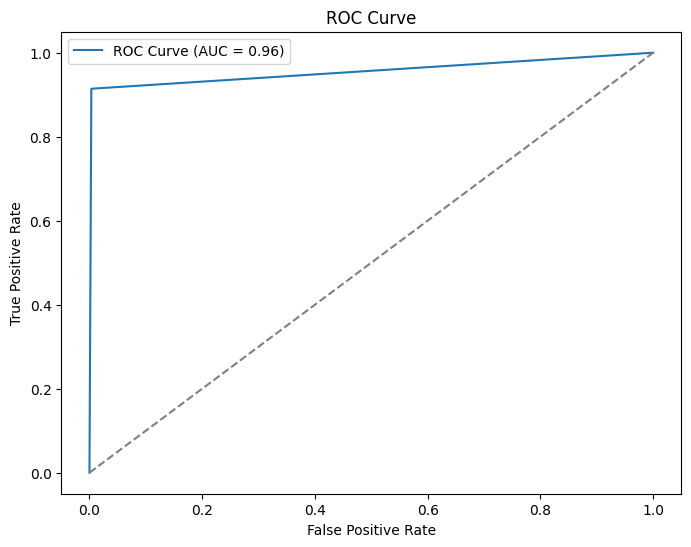

Best parameters found by grid search: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Model Accuracy: 0.986
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.93      0.93      0.93       105

    accuracy                           0.99      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix (Tuned Model):
 [[888   7]
 [  7  98]]
Tuned Model ROC-AUC Score: 0.9673317371641394


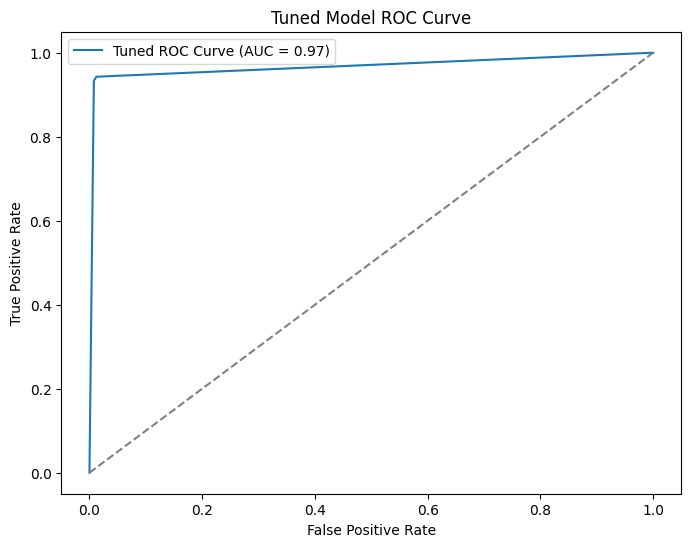

In [ ]:
# Step 3: Evaluate the baseline model (before hyperparameter tuning)
# ... (code to define and train the baseline model is missing)

# Assuming the baseline model is a DecisionTreeClassifier with default parameters:
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = baseline_model.predict(X_test)# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy}")# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC-AUC Score
y_prob = baseline_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 4: Model Improvement via Hyperparameter Tuning (Grid Search)
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid search for best parameters
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found by grid search:", grid_search.best_params_)

# Step 5: Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Accuracy
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {tuned_accuracy}")

# Classification Report for the tuned model
print("Tuned Model Classification Report:\n", classification_report(y_test, y_pred_tuned))

# Confusion matrix for the tuned model
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix (Tuned Model):\n", conf_matrix_tuned)

# ROC-AUC Score for the tuned model
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]
roc_auc_tuned = roc_auc_score(y_test, y_prob_tuned)
print(f"Tuned Model ROC-AUC Score: {roc_auc_tuned}")

# Plot ROC curve for the tuned model
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_prob_tuned)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned ROC Curve (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Model ROC Curve')
plt.legend()
plt.show()


Before tuning (AUC = 0.96): The model is already doing a good job at telling the difference between the two groups, with strong performance overall.

After tuning (AUC = 0.97): The model got even better after adjusting its settings, showing a small but noticeable improvement in how well it can make accurate predictions.








## Model Performance Comparison and Final Model Selection

| Model                | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|----------------------|----------|---------------------|------------------|--------------------|
| Default Decision Tree | 0.988    | 0.95                | 0.93             | 0.94               |
| Pre-Pruning           | 0.984    | 0.93                | 0.91             | 0.92               |
| Post-Pruning          | 0.990    | 0.97                | 0.93             | 0.95               |


**Accuracy**: The post-pruning model has the highest accuracy at 99.0%, but all three models performed very well, with only small differences in accuracy.

**Precision**: The post-pruning model is the best at avoiding false positives, meaning it rarely predicts "Loan" when there isn't one.

**Recall**: Both the pre-pruning and post-pruning models miss a few more actual loan-takers compared to the default model, meaning they are a bit less likely to catch everyone who would take a loan.

**F1-Score**: The post-pruning model does the best job of balancing between precision and recall, making it the most reliable overall for predicting loans.


The **post-pruning model** is the best choice.

### Why:
- **Accuracy**: It has the highest accuracy (99.0%), meaning it makes the most correct predictions overall.
- **Precision**: It's the best at avoiding false predictions, meaning it rarely says "Loan" when there isn’t one.
- **F1-Score**: It strikes the best balance between catching all loan-takers (recall) and not making too many mistakes (precision), making it the most reliable for predicting loans accurately.the **post-pruning model** is the best because it gets the right balance between being accurate and careful with its predictions.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

Based on the best-performing **post-pruning model**, here are three simple insights and recommendations for predicting if a customer will buy personal loans, understanding important customer traits, and deciding which customer groups to target:

### 1. **Focus on Customers Likely to Buy Loans**
   - **Insight**: The model shows that customers with traits like higher income, more credit card spending, and larger families are more likely to buy personal loans.
   - **Recommendation**: Focus marketing and offers on these types of customers since they are more likely to purchase loans.

### 2. **Don't Miss Potential Loan Customers**
   - **Insight**: While the model does well, it still misses some customers who may want a loan.
   - **Recommendation**: Re-engage customers who almost qualified as loan-takers with special offers or follow-ups to turn them into buyers.

### 3. **Use Key Customer Traits for Targeting**
   - **Insight**: Traits like income, family size, and credit card spending are key in predicting loan purchases.
   - **Recommendation**: Target customers with these traits to increase your chances of successful loan offers and focus marketing efforts more effectively.

These insights will help in understanding which customers are most likely to buy loans and how to better target them to increase loan sales.


___